<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/Claude3_data_extraction_from_screenshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CorneAI Project: Extracting Relevant Text from Smartphone Screenshots Using Claude3 Vision**


##**Setup environment**

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# APIの設定
from google.colab import drive
drive.mount("/content/drive")

with open("/content/drive/MyDrive/Deep_learning/api.txt") as file:
    #text = file.read()
    i=1
    key = []
    while True:
        include_break_line = file.readline() #改行が含まれた行
        line = include_break_line.rstrip() #改行を取り除く
        if line: #keyの読み込み
            #print(f'{i}行目：{line}')
            key.append(line)
            i += 1
        else:
            break

# APIキーの準備
# #ngrok_aceess_token = key[5]
#openai_api_key = key[3]
# deepl_auth_key = key[1]
# serp_api_key = key[7]

import os
os.environ["OPENAI_API_KEY"] = key[3]
os.environ["SERPAPI_API_KEY"] = key[7]
os.environ["GOOGLE_CSE_ID"] = key[9]
os.environ["GOOGLE_API_KEY"] = key[11]
os.environ["ANTHROPIC_API_KEY"] = key[21]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install anthropic

##**Single image analysis**

In [25]:
import anthropic
import base64
from google.colab import files
import httpx

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)



# image1_url = "https://upload.wikimedia.org/wikipedia/commons/a/a7/Camponotus_flavomarginatus_ant.jpg"
# image1_media_type = "image/jpeg"
# image1_data = base64.b64encode(httpx.get(image1_url).content).decode("utf-8")



# ファイルアップロードのダイアログを表示
uploaded_file = files.upload()

# アップロードされたファイルのファイル名を取得
file_name = list(uploaded_file.keys())[0]
print(file_name)

# 画像ファイルを読み込み、base64エンコードを行う
with open(file_name, "rb") as f:
    image_data = f.read()
    image1_data = base64.b64encode(image_data).decode("utf-8")

# 画像のMIMEタイプを設定（必要に応じて変更）
image1_media_type = "image/jpeg"  # または "image/png" など



Saving IMG_4955_3.JPG to IMG_4955_3.JPG
IMG_4955_3.JPG


In [32]:
prompt = """
Given an image, provide the following information in a list format:
["figure_num", "top1_diag", "top1_prob", "top2_diag", "top2_prob", "top3_diag", "top3_prob"]
The image shows a close-up view of an eye. Based on the information provided in the image, please carefully extract the following details:

figure_num: The clear and unambiguous identifier or file name of the image. If the identifier is unclear, carefully verify and choose the most likely identifier.
top1_diag: The top diagnosis with the highest probability
top1_prob: The probability of the top diagnosis (expressed as a decimal between 0 and 1)
top2_diag: The second top diagnosis
top2_prob: The probability of the second top diagnosis (expressed as a decimal between 0 and 1)
top3_diag: The third top diagnosis
top3_prob: The probability of the third top diagnosis (expressed as a decimal between 0 and 1)

Please provide the information in a list format as requested. If any of the values are not available, include "N/A" in the corresponding list element.
"""

In [33]:
client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)

message = client.messages.create(
    #model="claude-3-opus-20240229",
    model = "claude-3-haiku-20240307",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image1_media_type,
                        "data": image1_data,
                    },
                },
                {
                    "type": "text",
                    "text": prompt,
                }
            ],
        }
    ],
)

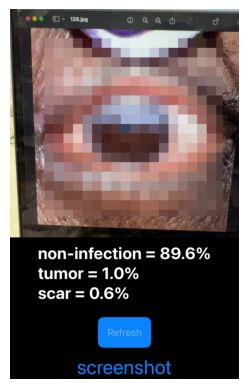

["128.jpg", "non-infection", 0.896, "tumor", 0.1, "scar", 0.006]


In [34]:
# 画像を開く
image = Image.open(file_name)

# 画像を表示
plt.imshow(image)
plt.axis('off')  # 軸を非表示にする
plt.show()

# textを抽出して表示
text = message.content[0].text
print(text)